In [19]:
# Setup Dependencies and Constants

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
from citipy import citipy

# Output File (CSV)
output_folder = "output_data"
output_filename = "cities"
output_file_type = "csv"
output_file = f"{output_folder}/{output_filename}.{output_file_type}"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
random_coordinates = 1500
total_cities = 500

# Weather API URL
url_stem = "http://api.openweathermap.org/data/2.5/weather?q="

print(f"""{str(total_cities)} cities will be found by searching up to {str(random_coordinates)} coordinates
between latitude {str(lat_range[0])} and {str(lat_range[1])}, and
between longitude {str(lng_range[0])} and {str(lng_range[1])}.""")
print(f"""
The cities' weather will be returned from,
{url_stem}<city>&appid=api_key&units=Imperial, 
and will be saved to: ./{output_file}""")

500 cities will be found by searching up to 1500 coordinates
between latitude -90 and 90, and
between longitude -180 and 180.

The cities' weather will be returned from,
http://api.openweathermap.org/data/2.5/weather?q=<city>&appid=api_key&units=Imperial, 
and will be saved to: ./output_data/cities.csv


In [2]:
# Generate Cities List

# Lists for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=random_coordinates)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=random_coordinates)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
print(f"{str(total_cities)} cities found")

588 cities found


In [3]:
# Print weather for a city
def print_weather(city_weather,city_num):
    city = dict(city_weather)
    city_number = str(city_num)
    city_name = city['City']
    city_latitude = str(city['Latitude'])
    city_longitude = str(city['Longitude'])
    city_max_temp = str(city['Maximum Temperature (F)'])
    city_humidity = str(city['Humidity (%)'])
    city_cloudiness = str(city['Cloudiness (%)'])
    city_wind_speed  = str(city['Wind Speed (MPH)'])
    print(f"City Weather #{city_number} {city_name} ({city_latitude},{city_longitude}): {city_max_temp}F {city_humidity}% Humidity {city_cloudiness}% Cloudy {city_wind_speed} mph Wind")
    pass
    
# Get Weather for a City
def get_city_weather(city):
    url = f"{url_stem}{city}&appid={api_key}&units=Imperial"
    weather_response = requests.get(url)
    weather = weather_response.json()
    latitude = weather["coord"]["lat"]
    longitude = weather["coord"]["lon"]
    max_temp = weather["main"]["temp_max"]
    humidity = weather["main"]["humidity"]
    cloudiness = weather["clouds"]["all"]
    wind_speed = weather["wind"]["speed"]
    return {"City":city,
            "Latitude":latitude,
            "Longitude":longitude,
            "Maximum Temperature (F)":max_temp,
            "Humidity (%)":humidity,
            "Cloudiness (%)":cloudiness,
            "Wind Speed (MPH)":wind_speed}

In [4]:
# Get Weather for All Cities
cities_found = 0
for city_num in range(1,total_cities):
    try:
        city_data = get_city_weather(cities[city_num])
        cities_found+=1
        print_weather(city_data,city_num)
        if cities_found==1:
            citydf = pd.DataFrame(city_data,index=[city_num])
        else:
            citydf = citydf.append(pd.DataFrame(city_data,index=[city_num]))
    except:
        print(f"Skipping #{str(city_num)} {cities[city_num]}")
print(f"Weather for {str(cities_found)} cities retrieved.")

City Weather #1 arraial do cabo (-22.97,-42.02): 68.09F 87% Humidity 97% Cloudy 14.29 mph Wind
City Weather #2 abbeville (50.11,1.83): 53.01F 93% Humidity 75% Cloudy 9.17 mph Wind
City Weather #3 mitsamiouli (-11.38,43.28): 82.4F 69% Humidity 40% Cloudy 12.75 mph Wind
City Weather #4 cape town (-33.93,18.42): 63F 82% Humidity 40% Cloudy 5.82 mph Wind
City Weather #5 dhidhdhoo (6.88,73.1): 79.79F 79% Humidity 94% Cloudy 12.93 mph Wind
City Weather #6 butaritari (3.07,172.79): 85.01F 62% Humidity 22% Cloudy 4.52 mph Wind
City Weather #7 rikitea (-23.12,-134.97): 70.61F 73% Humidity 80% Cloudy 12.12 mph Wind
City Weather #8 karpogory (64,44.44): 39.47F 91% Humidity 99% Cloudy 8.34 mph Wind
City Weather #9 ribeira grande (38.52,-28.7): 70.61F 85% Humidity 9% Cloudy 10.36 mph Wind
City Weather #10 chuy (-33.69,-53.46): 58.19F 93% Humidity 0% Cloudy 11.39 mph Wind
City Weather #11 mataura (-46.19,168.86): 45F 83% Humidity 85% Cloudy 8.01 mph Wind
City Weather #12 khatanga (71.98,102.47): 31.

City Weather #105 mwinilunga (-11.73,24.43): 70.61F 18% Humidity 73% Cloudy 4.54 mph Wind
City Weather #106 boca do acre (-8.76,-67.39): 74.39F 86% Humidity 100% Cloudy 1.14 mph Wind
City Weather #107 christchurch (-43.53,172.64): 48.2F 87% Humidity 98% Cloudy 20.8 mph Wind
City Weather #108 lakes entrance (-37.88,147.99): 59F 51% Humidity 71% Cloudy 1.99 mph Wind
City Weather #109 parabel (58.71,81.5): 38.21F 96% Humidity 100% Cloudy 8.59 mph Wind
City Weather #110 port blair (11.67,92.75): 84.11F 70% Humidity 98% Cloudy 2.42 mph Wind
Skipping #111 chagda
City Weather #112 barrow (-38.31,-60.23): 56.93F 99% Humidity 100% Cloudy 2.19 mph Wind
City Weather #113 pahalgam (34.03,75.33): 65.93F 62% Humidity 68% Cloudy 3.74 mph Wind
City Weather #114 yankton (42.87,-97.4): 73.4F 94% Humidity 90% Cloudy 17.22 mph Wind
City Weather #115 kamenka (48.03,28.7): 61.79F 56% Humidity 5% Cloudy 8.93 mph Wind
City Weather #116 merauke (-8.49,140.4): 79.07F 86% Humidity 31% Cloudy 25.1 mph Wind
City W

City Weather #203 hirara (24.8,125.28): 78.8F 94% Humidity 75% Cloudy 21.92 mph Wind
City Weather #204 dalbandin (28.9,64.41): 92.03F 20% Humidity 0% Cloudy 11.01 mph Wind
City Weather #205 keti bandar (24.14,67.45): 83.57F 82% Humidity 91% Cloudy 9.55 mph Wind
City Weather #206 saryagash (41.45,69.17): 62.6F 59% Humidity 0% Cloudy 6.93 mph Wind
City Weather #207 beringovskiy (63.05,179.32): 33.35F 78% Humidity 7% Cloudy 1.59 mph Wind
City Weather #208 guarapari (-20.67,-40.5): 68F 100% Humidity 90% Cloudy 1.5 mph Wind
City Weather #209 kodiak (39.95,-94.76): 77F 83% Humidity 1% Cloudy 12.75 mph Wind
City Weather #210 prigorodka (52.04,39.71): 51.8F 93% Humidity 90% Cloudy 4.47 mph Wind
City Weather #211 merritt island (28.54,-80.67): 82.4F 78% Humidity 1% Cloudy 8.05 mph Wind
City Weather #212 trelew (-43.25,-65.31): 49.55F 31% Humidity 36% Cloudy 14.5 mph Wind
City Weather #213 port elizabeth (39.31,-74.98): 70F 93% Humidity 100% Cloudy 3.94 mph Wind
City Weather #214 bambanglipuro (

City Weather #306 klaksvik (62.23,-6.59): 42.8F 75% Humidity 100% Cloudy 11.41 mph Wind
Skipping #307 asau
City Weather #308 encruzilhada do sul (-30.54,-52.52): 55.49F 88% Humidity 0% Cloudy 3.18 mph Wind
City Weather #309 zyryanka (65.73,150.89): 29.21F 86% Humidity 100% Cloudy 18.72 mph Wind
City Weather #310 winooski (44.49,-73.18): 44.6F 100% Humidity 90% Cloudy 3.13 mph Wind
City Weather #311 tuburan (10.73,123.82): 91.4F 55% Humidity 75% Cloudy 10.29 mph Wind
Skipping #312 shcholkine
City Weather #313 cine (37.61,28.06): 60.8F 87% Humidity 0% Cloudy 3.36 mph Wind
City Weather #314 queimadas (-7.36,-35.9): 69.8F 94% Humidity 75% Cloudy 9.17 mph Wind
Skipping #315 utiroa
City Weather #316 polunochnoye (60.87,60.43): 39.29F 68% Humidity 100% Cloudy 10.92 mph Wind
City Weather #317 bishop auckland (54.66,-1.68): 48.99F 100% Humidity 0% Cloudy 4.7 mph Wind
City Weather #318 tongliao (43.61,122.27): 88.79F 22% Humidity 0% Cloudy 19.13 mph Wind
City Weather #319 dawei (14.07,98.19): 83

City Weather #410 san quintin (17.54,120.52): 82.31F 82% Humidity 69% Cloudy 8.48 mph Wind
City Weather #411 shadrinsk (56.09,63.63): 41.63F 73% Humidity 94% Cloudy 11.54 mph Wind
City Weather #412 fort-shevchenko (44.51,50.26): 62.69F 70% Humidity 100% Cloudy 12.77 mph Wind
City Weather #413 porto belo (-27.15,-48.54): 69.01F 93% Humidity 75% Cloudy 6.93 mph Wind
City Weather #414 talara (-4.58,-81.27): 65.39F 91% Humidity 90% Cloudy 17.78 mph Wind
City Weather #415 amos (48.57,-78.12): 42.8F 80% Humidity 90% Cloudy 2.24 mph Wind
City Weather #416 sao jose da coroa grande (-8.9,-35.15): 69.35F 95% Humidity 27% Cloudy 3.33 mph Wind
City Weather #417 touros (-5.2,-35.46): 71.6F 94% Humidity 40% Cloudy 3.36 mph Wind
City Weather #418 khani (41.96,42.96): 64.4F 88% Humidity 0% Cloudy 4.7 mph Wind
City Weather #419 sorland (67.67,12.69): 42.8F 81% Humidity 75% Cloudy 8.05 mph Wind
City Weather #420 taltal (-25.41,-70.49): 49.55F 88% Humidity 51% Cloudy 2.39 mph Wind
City Weather #421 fairb

City Weather #514 kollam (8.88,76.6): 84.2F 79% Humidity 75% Cloudy 4.7 mph Wind
City Weather #515 montlucon (46.33,2.6): 55F 95% Humidity 56% Cloudy 3.94 mph Wind
City Weather #516 port hardy (50.7,-127.42): 37.4F 86% Humidity 5% Cloudy 3.36 mph Wind
City Weather #517 nuevo progreso (26.05,-97.95): 84F 88% Humidity 75% Cloudy 4.7 mph Wind
City Weather #518 remiremont (48.02,6.59): 59F 93% Humidity 0% Cloudy 5.46 mph Wind
Skipping #519 ambodifototra
City Weather #520 isangel (-19.55,169.27): 78.8F 78% Humidity 75% Cloudy 18.9 mph Wind
City Weather #521 rio gallegos (-51.62,-69.22): 32F 94% Humidity 0% Cloudy 17.22 mph Wind
City Weather #522 mutsu (41.29,141.2): 79F 78% Humidity 40% Cloudy 10.29 mph Wind
City Weather #523 kayes (14.44,-11.44): 80.15F 74% Humidity 100% Cloudy 1.5 mph Wind
City Weather #524 gat (14.69,-16.54): 77F 94% Humidity 20% Cloudy 4.7 mph Wind
City Weather #525 haines junction (60.75,-137.51): 32.27F 63% Humidity 100% Cloudy 4.92 mph Wind
Skipping #526 meyungs
City

In [6]:
# Display dataframe
citydf.head()

,City,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
1,arraial do cabo,-22.97,-42.02,68.09,87,97,14.29
2,abbeville,50.11,1.83,53.01,93,75,9.17
3,mitsamiouli,-11.38,43.28,82.40,69,40,12.75
4,cape town,-33.93,18.42,63.00,82,40,5.82
5,dhidhdhoo,6.88,73.10,79.79,79,94,12.93


In [7]:
# Export city weather data to CSV
citydf.to_csv(f"{output_file}")

# Show Correlations
citydf.corr(method='pearson')

,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
Latitude,1.000000,-0.046933,-0.439050,0.163107,0.147404,-0.158869
Longitude,-0.046933,1.000000,0.142915,-0.314119,0.064305,0.107332
Maximum Temperature (F),-0.439050,0.142915,1.000000,-0.327601,-0.238356,0.031947
Humidity (%),0.163107,-0.314119,-0.327601,1.000000,0.328525,-0.149722
Cloudiness (%),0.147404,0.064305,-0.238356,0.328525,1.000000,0.032343
Wind Speed (MPH),-0.158869,0.107332,0.031947,-0.149722,0.032343,1.000000


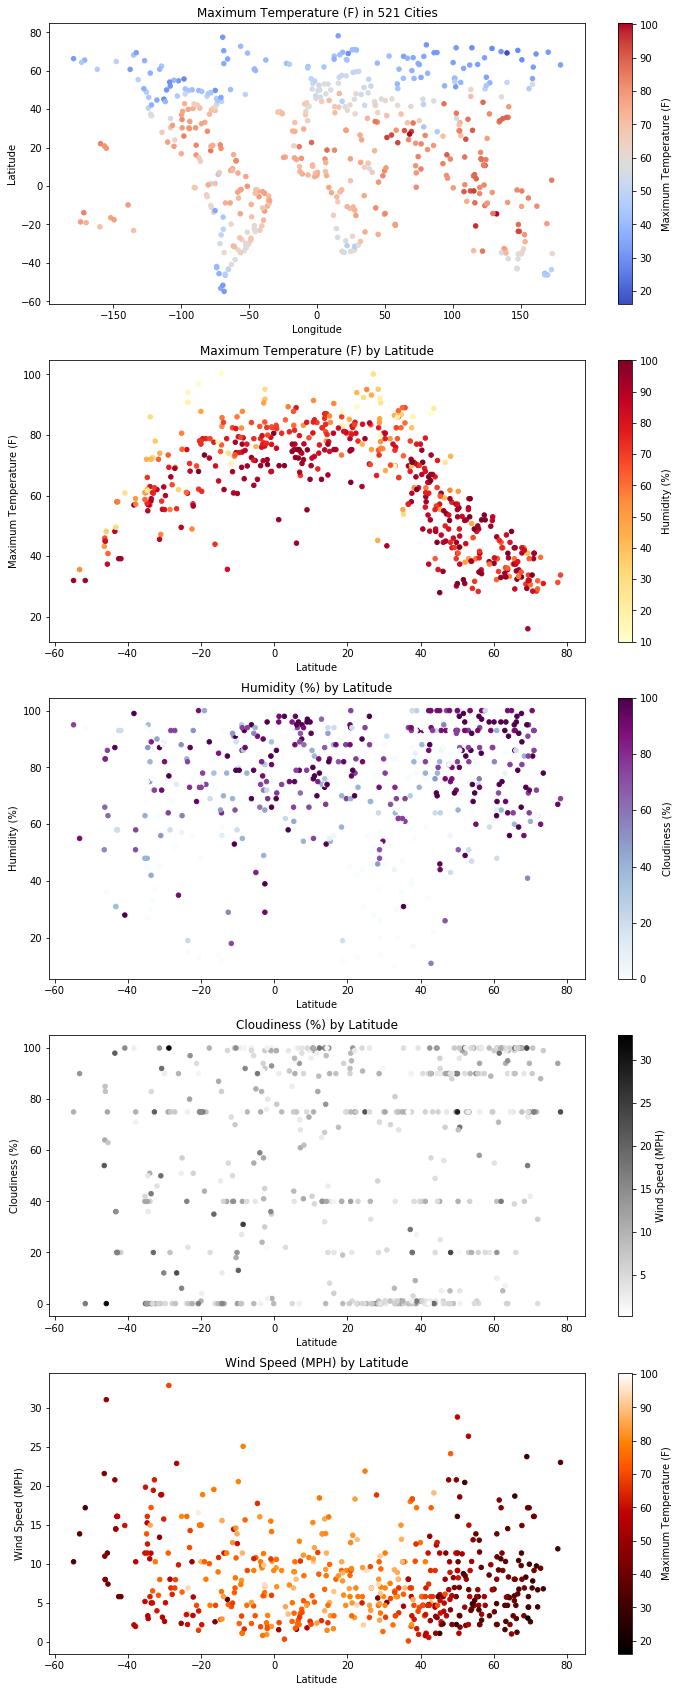

In [24]:
# Chart Wheather
fig = plt.figure(figsize=(12,30))
ax0 = fig.add_subplot(511)
citydf.plot.scatter(x='Longitude',
                    y='Latitude',
                    c='Maximum Temperature (F)',
                    colormap='coolwarm',
                    title=f"Maximum Temperature (F) in {str(cities_found)} Cities",
                    ax=ax0)
ax1 = fig.add_subplot(512)
citydf.plot.scatter(x='Latitude',
                    y='Maximum Temperature (F)',
                    c='Humidity (%)',
                    colormap='YlOrRd',
                    title=f"Maximum Temperature (F) by Latitude",
                    ax=ax1)
ax2 = fig.add_subplot(513)
citydf.plot.scatter(x='Latitude',
                    y='Humidity (%)',
                    c='Cloudiness (%)',
                    colormap='BuPu',
                    title=f"Humidity (%) by Latitude",
                    ax=ax2)
ax3 = fig.add_subplot(514)
citydf.plot.scatter(x='Latitude',
                    y='Cloudiness (%)',
                    c='Wind Speed (MPH)',
                    colormap='binary',
                    title=f"Cloudiness (%) by Latitude",
                    ax=ax3)
ax4 = fig.add_subplot(515)
citydf.plot.scatter(x='Latitude',
                    y='Wind Speed (MPH)',
                    c='Maximum Temperature (F)',
                    colormap='gist_heat',
                    title=f"Wind Speed (MPH) by Latitude",
                    ax=ax4)
fig.savefig(f"{output_folder}/charts.png")

In [23]:
print("""All cities were plotted by latitude and longitude to verify a random distibution throughout the world.
Maximum temperature has a strong curvilinear relationship with latitude.  As the poles are approached, temperature drops.
Latitude appears to have no relationship with cloudiness.
Latitude may have a weak curvilinear relationship with humidity and wind speed. The relationship of humidity is in the 
same direction as temperature, while wind speed is inverse.""")

All cities were plotted by latitude and longitude to verify a random distibution throughout the world.
Maximum temperature has a strong curvilinear relationship with latitude.  As the poles are approached, temperature drops.
Latitude appears to have no relationship with cloudiness.
Latitude may have a weak curvilinear relationship with humidity and wind speed. The relationship of humidity is in the 
same direction as temperature, while wind speed is inverse.
